<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#[1-Q1]-Optimal-estimator-of-V-from-U-of-the-form-$\alpha-U$" data-toc-modified-id="[1-Q1]-Optimal-estimator-of-V-from-U-of-the-form-$\alpha-U$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>[1-Q1] Optimal estimator of V from U of the form $\alpha U$</a></span><ul class="toc-item"><li><span><a href="#MSE-numerical-estimate" data-toc-modified-id="MSE-numerical-estimate-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>MSE numerical estimate</a></span></li></ul></li><li><span><a href="#[1-Q2]-Optimal-estimator-of-V-from-U-of-the-form-$\alpha--+-\beta-U$" data-toc-modified-id="[1-Q2]-Optimal-estimator-of-V-from-U-of-the-form-$\alpha--+-\beta-U$-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>[1-Q2] Optimal estimator of V from U of the form $\alpha  + \beta U$</a></span></li><li><span><a href="#[1-Q3]-Optimal-estimator-of-V-from-U-of-the-form-$\alpha-+-\beta-U-+-\gamma-U^2$" data-toc-modified-id="[1-Q3]-Optimal-estimator-of-V-from-U-of-the-form-$\alpha-+-\beta-U-+-\gamma-U^2$-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>[1-Q3] Optimal estimator of V from U of the form $\alpha + \beta U + \gamma U^2$</a></span></li><li><span><a href="#[2-Q6]-EKF-implementation" data-toc-modified-id="[2-Q6]-EKF-implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>[2-Q6] EKF implementation</a></span><ul class="toc-item"><li><span><a href="#Plot-the-measured-and-truth-data-for-visualization" data-toc-modified-id="Plot-the-measured-and-truth-data-for-visualization-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot the measured and truth data for visualization</a></span></li><li><span><a href="#Initialize-the-necessary-parameters/variables" data-toc-modified-id="Initialize-the-necessary-parameters/variables-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Initialize the necessary parameters/variables</a></span></li><li><span><a href="#Implement-the-EKF-for-measurements.npy" data-toc-modified-id="Implement-the-EKF-for-measurements.npy-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Implement the EKF for measurements.npy</a></span><ul class="toc-item"><li><span><a href="#RMS-for-y" data-toc-modified-id="RMS-for-y-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>RMS for y</a></span></li></ul></li><li><span><a href="#Implement-the-EKF-for-measurements2.npy" data-toc-modified-id="Implement-the-EKF-for-measurements2.npy-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Implement the EKF for measurements2.npy</a></span><ul class="toc-item"><li><span><a href="#RMS-for-y2" data-toc-modified-id="RMS-for-y2-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>RMS for y2</a></span></li></ul></li></ul></li><li><span><a href="#Particle-Filter" data-toc-modified-id="Particle-Filter-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Particle Filter</a></span><ul class="toc-item"><li><span><a href="#The-Particle-Filter-algorithm-(with-resampling-step)" data-toc-modified-id="The-Particle-Filter-algorithm-(with-resampling-step)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The Particle Filter algorithm (with resampling step)</a></span></li><li><span><a href="#Plot-mean-and-variance-superposed-to-trajectory" data-toc-modified-id="Plot-mean-and-variance-superposed-to-trajectory-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Plot mean and variance superposed to trajectory</a></span></li></ul></li></ul></div>

# ECE6555 HW5

Author: Teo Wilkening 

Due Date: 2022-12-16

## [1-Q1] Optimal estimator of V from U of the form $\alpha U$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

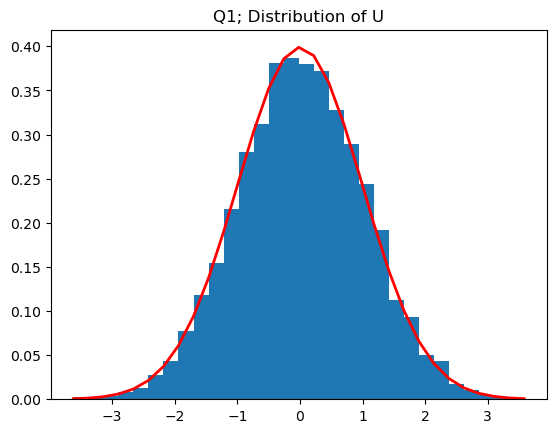

In [2]:
u_mu, u_sigma = 0, 1
n = 10000 # number of samples
u = np.random.normal(u_mu, u_sigma,n)
count, bins, ignored = plt.hist(u, 30, density=True)
plt.plot(bins, 1/(u_sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - u_mu)**2 / (2 * u_sigma**2) ),
         linewidth=2, color='r')
plt.title('Q1; Distribution of U')
plt.show()

### MSE numerical estimate

In [3]:
v = np.sqrt(u**2)
Rv  = np.sum(v**2)/n
Rvu = np.sum(u*v)/n
v_mu = np.sum(v)/n
MSE_linear = Rv - Rvu**2 - v_mu**2
print(f"""The Mean Square error of the linear estimate (for v centered) is: {MSE_linear}""")

MSE_uncentered = Rv - Rvu**2
print(f"""The Mean Square error of the linear estimate (for v un-centered) is: {MSE_uncentered}""")


The Mean Square error of the linear estimate (for v centered) is: 0.362708823099285
The Mean Square error of the linear estimate (for v un-centered) is: 1.0130574309689977


## [1-Q2] Optimal estimator of V from U of the form $\alpha  + \beta U$

In [4]:
MSE_affine = Rv - Rvu**2 - v_mu**2
print(f"""The Mean Square error of the affine estimate (for v centered) is: {MSE_affine}""")

The Mean Square error of the affine estimate (for v centered) is: 0.362708823099285


## [1-Q3] Optimal estimator of V from U of the form $\alpha + \beta U + \gamma U^2$

In [5]:
alpha = v_mu
beta = Rvu
phi = np.sum((u**2)*v)/n
gamma = 1/3*(phi - v_mu)
MSE_quadratic = Rv - 2*(beta*Rvu + gamma*phi + v_mu**2) + (v_mu**2 + beta**2 + 3*gamma**2 + 2*v_mu*gamma)
print(f"""The Mean Square error of the quadratic estimate (for v centered) is: {MSE_quadratic}""")

The Mean Square error of the quadratic estimate (for v centered) is: 0.1423163012004771


## [2-Q6] EKF implementation

(will be borrowing my code from HW #4)

### Plot the measured and truth data for visualization

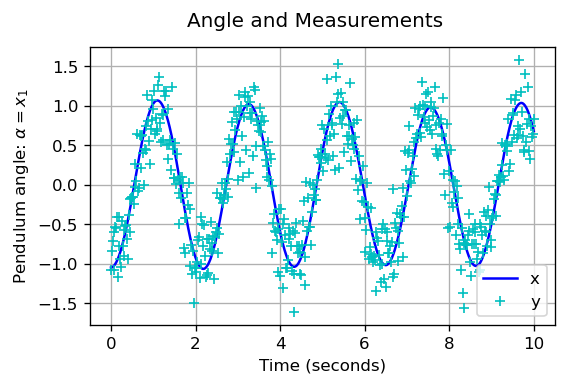

In [6]:
import numpy as np
from scipy import signal

tscale, x = np.load("groundtruth.npy") # ground truth at 1ms
tscale_measurement, y = np.load("measurements.npy") # sampled at 20ms
tscale_measurement2, y2 = np.load("measurements2.npy") # sampled at 2ms

fig, ax = plt.subplots(figsize=(5,3), dpi=120)

ax.plot(tscale,x,'b')
ax.grid(True)
ax.plot(tscale_measurement,y,'c+')
ax.legend(['x','y'])
ax.set_ylabel(r'Pendulum angle: $\alpha = x_1$')
ax.set_xlabel(r'Time (seconds)')
fig.suptitle('Angle and Measurements')

plt.show()

### Initialize the necessary parameters/variables

In [7]:
# initialize all of the variables that we're going to need
Delta = 0.020 # 20 ms
sigma_m = 0.3
sigma_p = 0.1
Qk = (sigma_p**2)*np.matrix([[Delta**3/3,Delta**2/2],
                            [Delta**2/2,Delta]])
Rk = np.matrix([sigma_m**2])
g = 9.8 # m/s^2

def f(xk,dt):
    fk_x = np.matrix([[xk[0][0] + xk[1][0]*dt],
                   [xk[1][0] - g*dt*np.sin(xk[0][0])]])
    return fk_x

def F(xhat,dt):
    F_x = np.matrix([[1                       , dt],
                    [-g*dt*np.sin(xhat[0][0]), 1]])
    return F_x

def h(xk,dt=None):
    return np.sin(xk[0][0])

def H(xhat,dt=None):
    return np.matrix([np.cos(xhat[0][0]), 0])

# # display Qk
# print(f"""Qk = {Qk} \n""")
# display(Rk)

# # test function f:
# xhat_kk = np.array([[1],[2]])
# print("f")
# display(f(xhat_kk,Delta))

# # test function F:
# print("xhat_kk")
# display(xhat_kk[0][0])
# print("F:")
# display(F(xhat_kk,Delta))

# # test function h
# xhat_km1 = np.array([[1],[2]])
# print("h:")
# display(h(xhat_km1))

# # test function K
# print("H:")
# display(H(xhat_km1))

### Implement the EKF for measurements.npy

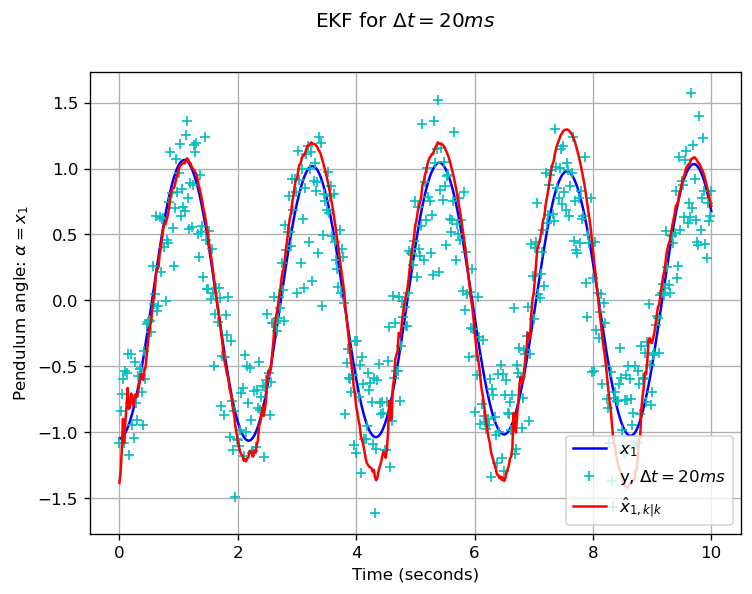

In [8]:
# the initial guesses of x and P
xhat_init = np.array([[y[0]],[0]]) # set alpha = y[0] and d(alpha)/dt = 0
P_init = np.identity(2)
NumSteps = len(y)

# initializing the matrices for computing Kalman filter state evolution over time
xhat_k_pred = np.zeros((NumSteps,2,1))
xhat_k_curr = np.zeros((NumSteps,2,1))
P_k_pred = np.zeros((NumSteps,2,2))
P_k_curr = np.zeros((NumSteps,2,2))
Kfk_curr = np.zeros((NumSteps,2,1))
I = np.identity(2)

# setup the initial states of the prediction steps, xhat 0|-1 and P 0|-1
xhat_k_pred[0,:,:] = xhat_init
P_k_pred[0,:,:] = P_init[:,:]

# start running the Extended Kalman Filter, using the NoisyMeasurements
for t in np.arange(1,NumSteps):
    ## update step, given the measurement
    # K f,i-1
    Hkm1 = H(xhat_k_pred[t-1,:,:])
    Kfk_curr[t-1,:,:] = P_k_pred[t-1,:,:] @ Hkm1.T @ np.linalg.inv(Hkm1 @ P_k_pred[t-1,:,:] @ Hkm1.T + Rk)
    # P i-1|i-1
    P_k_curr[t-1,:,:] = (I - Kfk_curr[t-1,:,:] @ Hkm1) @ P_k_pred[t-1,:,:]
    # x i-1|i-1
    xhat_k_curr[t-1,:,:] = xhat_k_pred[t-1,:,:] + Kfk_curr[t-1,:,:] * (y[t-1] - h(xhat_k_pred[t-1,:,:]) )
    
    ## Predicition Step
    # x i|i-1
    xhat_k_pred[t,:,:] = f(xhat_k_curr[t-1,:,:],Delta)
    # P i|i-1
    P_k_pred[t,:,:] = F(xhat_k_curr[t-1,:,:],Delta) @ P_k_curr[t-1,:,:] @ F(xhat_k_curr[t-1,:,:],Delta).T + Qk  

## and set the last Update step
t = NumSteps - 1
# K f,t
Hkm1 = H(xhat_k_pred[t,:,:])
Kfk_curr[t,:,:] = P_k_pred[t,:,:] @ Hkm1.T @ np.linalg.inv(Hkm1 @ P_k_pred[t,:,:] @ Hkm1.T + Rk)
# P t|t
P_k_curr[t,:,:] = (I - Kfk_curr[t,:,:] @ Hkm1) @ P_k_pred[t,:,:]
# x t|t
xhat_k_curr[t,:,:] = xhat_k_pred[t,:,:] + Kfk_curr[t,:,:] * (y[t] - h(xhat_k_pred[t,:,:]) )

fig, ax = plt.subplots(figsize=(7,5), dpi=120)

ax.plot(tscale,x,'b')
ax.grid(True)
ax.plot(tscale_measurement,y,'c+')
ax.plot(tscale_measurement,xhat_k_curr[:,0,:],'r-')
ax.legend([r'$x_1$',r'y, $\Delta t = 20ms$',r'$\hat{x}_{1,k|k}$'])
ax.set_ylabel(r'Pendulum angle: $\alpha = x_1$')
ax.set_xlabel(r'Time (seconds)')
fig.suptitle(r'EKF for $\Delta t = 20ms$')

plt.show()


#### RMS for y

In [9]:
x_20ms = x[::20]
error = y - x_20ms
error_kalman_f = xhat_k_curr[:,0,:].reshape(-1) - x_20ms
rms_error = np.sqrt(np.sum(error**2)/len(y))
rms_kalman_f = np.sqrt(np.sum(error_kalman_f**2)/len(y))

print(f'''RMS of the measurement y error: {rms_error}''')
print(f'''RMS of the EKF estimates: {rms_kalman_f}''')

RMS of the measurement y error: 0.31853835229944727
RMS of the EKF estimates: 0.18003291734915677


### Implement the EKF for measurements2.npy

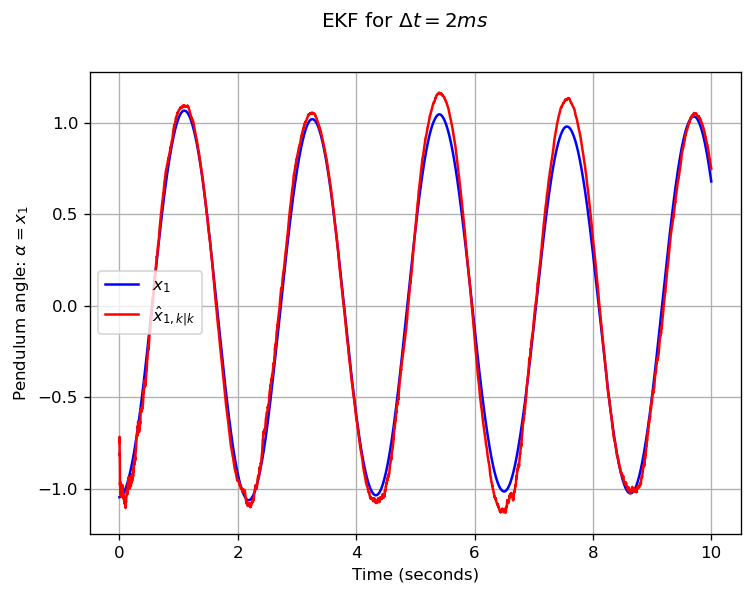

In [10]:
# initialize all of the variables that we're going to need
Delta = 0.002 # 2 ms
sigma_m = 0.3
sigma_p = 0.1
Qk = (sigma_p**2)*np.matrix([[Delta**3/3,Delta**2/2],
                            [Delta**2/2,Delta]])
Rk = np.matrix([sigma_m**2])
g = 9.8 # m/s^2

def f(xk,dt):
    fk_x = np.matrix([[xk[0][0] + xk[1][0]*dt],
                   [xk[1][0] - g*dt*np.sin(xk[0][0])]])
    return fk_x

def F(xhat,dt):
    F_x = np.matrix([[1                       , dt],
                    [-g*dt*np.sin(xhat[0][0]), 1]])
    return F_x

def h(xk,dt=None):
    return np.sin(xk[0][0])

def H(xhat,dt=None):
    return np.matrix([np.cos(xhat[0][0]), 0])

# the initial guesses of x and P
xhat_init = np.array([[y2[0]],[0]]) # set alpha = y2[0] and d(alpha)/dt = 0
P_init = np.identity(2)
NumSteps = len(y2)

# initializing the matrices for computing Kalman filter state evolution over time
xhat_k_pred = np.zeros((NumSteps,2,1))
xhat_k_curr = np.zeros((NumSteps,2,1))
P_k_pred = np.zeros((NumSteps,2,2))
P_k_curr = np.zeros((NumSteps,2,2))
Kfk_curr = np.zeros((NumSteps,2,1))
I = np.identity(2)

# setup the initial states of the prediction steps, xhat 0|-1 and P 0|-1
xhat_k_pred[0,:,:] = xhat_init
P_k_pred[0,:,:] = P_init[:,:]

# start running the Extended Kalman Filter, using the NoisyMeasurements
for t in np.arange(1,NumSteps):
    ## update step, given the measurement
    # K f,i-1
    Hkm1 = H(xhat_k_pred[t-1,:,:])
    Kfk_curr[t-1,:,:] = P_k_pred[t-1,:,:] @ Hkm1.T @ np.linalg.inv(Hkm1 @ P_k_pred[t-1,:,:] @ Hkm1.T + Rk)
    # P i-1|i-1
    P_k_curr[t-1,:,:] = (I - Kfk_curr[t-1,:,:] @ Hkm1) @ P_k_pred[t-1,:,:]
    # x i-1|i-1
    xhat_k_curr[t-1,:,:] = xhat_k_pred[t-1,:,:] + Kfk_curr[t-1,:,:] * (y2[t-1] - h(xhat_k_pred[t-1,:,:]) )
    
    ## Predicition Step
    # x i|i-1
    xhat_k_pred[t,:,:] = f(xhat_k_curr[t-1,:,:],Delta)
    # P i|i-1
    P_k_pred[t,:,:] = F(xhat_k_curr[t-1,:,:],Delta) @ P_k_curr[t-1,:,:] @ F(xhat_k_curr[t-1,:,:],Delta).T + Qk  

## and set the last Update step
t = NumSteps - 1
# K f,t
Hkm1 = H(xhat_k_pred[t,:,:])
Kfk_curr[t,:,:] = P_k_pred[t,:,:] @ Hkm1.T @ np.linalg.inv(Hkm1 @ P_k_pred[t,:,:] @ Hkm1.T + Rk)
# P t|t
P_k_curr[t,:,:] = (I - Kfk_curr[t,:,:] @ Hkm1) @ P_k_pred[t,:,:]
# x t|t
xhat_k_curr[t,:,:] = xhat_k_pred[t,:,:] + Kfk_curr[t,:,:] * (y2[t] - h(xhat_k_pred[t,:,:]) )

fig, ax = plt.subplots(figsize=(7,5), dpi=120)

ax.plot(tscale,x,'b')
ax.grid(True)
# ax.plot(tscale_measurement2,y2,'c+')
ax.plot(tscale_measurement2,xhat_k_curr[:,0,:],'r-')
# ax.legend([r'$x_1$','y2',r'$\hat{x}_{1,k|k}$'])
ax.legend([r'$x_1$',r'$\hat{x}_{1,k|k}$'])
ax.set_ylabel(r'Pendulum angle: $\alpha = x_1$')
ax.set_xlabel(r'Time (seconds)')
fig.suptitle(r'EKF for $\Delta t = 2ms$')

plt.show()


#### RMS for y2

In [11]:
x_2ms = x[::2]
error = y2 - x_2ms
error_kalman_f = xhat_k_curr[:,0,:].reshape(-1) - x_2ms
rms_error = np.sqrt(np.sum(error**2)/len(y2))
rms_kalman_f = np.sqrt(np.sum(error_kalman_f**2)/len(y2))

print(f'''RMS of the measurement y2 error: {rms_error}''')
print(f'''RMS of the EKF estimates: {rms_kalman_f}''')

RMS of the measurement y2 error: 0.31134887639065506
RMS of the EKF estimates: 0.0677126618156732


## Particle Filter

### The Particle Filter algorithm (with resampling step)

In [12]:
Delta = 0.020 # 20 ms
sigma_m = 0.3
sigma_p = 0.1
Qk = (sigma_p**2)*np.matrix([[Delta**3/3,Delta**2/2],
                            [Delta**2/2,Delta]])
NumSteps = len(y)

# 1) draw n samples from the prior
# 2) for each k = 1...T
#     a) draw samples x_k(i) from the importance distribution
#     b) compute the new weights
#     c) normalize the new weights

# initialize x^i_k and w^i_k matrices to keep track of state estimation distributions and weights
n = 200 # number of particles
xki = np.zeros((NumSteps,2,n),dtype=float)
wki = np.zeros((NumSteps,n),dtype=float)
pi_ki = np.zeros((NumSteps,2,n))

# 1) draw n samples from the prior
x0_mu, x0_sigma = y[0], np.sqrt(0.5)
x0 = np.random.normal(x0_mu, x0_sigma, n)
w0 = 1/n*np.ones(n)

# insert the samples from the prior into our matrices for keeping track of things
xki[0,:] = x0
wki[0,:] = w0

# initialize noise Gaussian parameters
q_mu, q_cov = [0,0], Qk
v_mu, v_sigma = 0, sigma_m

# 2) for each k = 1...T
mean = np.zeros(NumSteps) # keep track of the mean of the particles
var = np.zeros(NumSteps) # keep track of the variance of the particles at each step
neff = np.zeros(NumSteps)

mean[0] = x0_mu
var[0] = x0_sigma**2

##################
# Need to figure out how to accurately sample and push 2nd state through the PF as well
# the following code will not function without more work/massaging being done.
##################

# for k in np.arange(1,NumSteps,1):
#     # a) draw samples x_k(i) from the importance distribution
#     # pi_ki[k,:,:] = np.matrix([[]])
#     xki[k,:] = 1/2*xki[k-1,:] + 25*xki[k-1,:]/(1 + xki[k-1,:]**2) + 8*np.cos(1.2*(k-1)) + \
#                 np.random.multivariate_normal(q_mu, q_cov,n)
#     # print(sum(xki[k,:]))
#     # b) compute the new weights
#     wki[k,:] = wki[k-1,:]*1/np.sqrt(2*np.pi)*np.exp(-0.5*(y[k] - 1/20*(xki[k-1,:]**2))**2)
#     # c) normalize the new weights
#     wki[k,:] = wki[k,:]/sum(wki[k,:])
#     mean[k] = np.average(xki[k,:],weights=wki[k,:])
#     var[k] = np.average((xki[k,:] - mean[k])**2,weights=wki[k,:])
#     neff[k] = 1/sum(wki[k,:]**2)
#     # draw new samples if the number of effective weights is < 20
#     if neff[k] < 20:
#         print(f"""Effective particles < 20 for step {k}""")
#         ind = np.argsort(xki[k,:]) # index sort of the particles
#         xki[k,:] = np.take_along_axis(xki[k,:],ind,axis=0)
#         wki[k,:] = np.take_along_axis(wki[k,:],ind,axis=0) # sort the weights according to the particles
#         bins = np.cumsum(wki[k,:]) # bins from which we are going to sample; cumulative sum of the weights
#         uni = np.random.uniform(0,1,n) # uniform distribution used for re-sampling
#         uni2 = np.random.uniform(0,1,n) # secondary random sampling for within bins
#         for i in np.arange(0,n):
#             for j in np.arange(n-1,-1,-1):
#                 if uni[i] >= bins[j]:
#                     xki[k,i] = xki[k,j] + (xki[k,j+1] - xki[k,j])*uni2[i]
#         # and reset the weights:
#         wki[k,:] = w0
        
# # track mean for later analysis
# mean_pf_resamp = mean

### Plot mean and variance superposed to trajectory

In [13]:
# # Plot the trajectory
# fig, ax = plt.subplots(figsize=(8,5), dpi=120)

# ax.plot(np.insert(TimeScale,0,0),x,'b--')
# ax.grid(True)
# ax.plot(np.insert(TimeScale,0,0),x,'bs',markersize=6)
# #plt.legend(['line','markers'])
# ax.set_ylabel(r'State $x_k$')
# ax.set_xlabel(r'Time (sample $k$)')
# for k in np.arange(1,NumSteps,1):
#     for i in np.arange(n):
#         if wki[k,i] > 1e-3:
#             ax.plot(k,xki[k,i],'ro',markersize=10*wki[k,i],alpha=0.3)
# ax.plot(mean,'r+')
# ax.fill_between(np.arange(NumSteps), mean-2*np.sqrt(var), mean+2*np.sqrt(var), alpha=0.25, color='r')
# fig.suptitle('Particle Filter with re-sampling')

# plt.show()